In [28]:
import pandas as pd
from pandas_datareader.data import DataReader
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
# For time stamps
from datetime import datetime


In [29]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [30]:
from pandas_datareader.data import DataReader
from datetime import datetime

df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643497
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783866
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917508
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2022-02-09,176.649994,174.899994,176.050003,176.279999,71285000.0,176.279999
2022-02-10,175.479996,171.550003,174.139999,172.119995,90865900.0,172.119995
2022-02-11,173.080002,168.039993,172.330002,168.639999,98566000.0,168.639999


In [31]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = StandardScaler()
scaler = scaler.fit(dataset)
dataset_scaled = scaler.transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = dataset_scaled[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([-0.87959679, -0.87765973, -0.87363656, -0.86980622, -0.87039348,
       -0.86906997, -0.86967476, -0.8706915 , -0.87207639, -0.86779026,
       -0.86392487, -0.86511692, -0.8716469 , -0.86541494, -0.87155047,
       -0.8485422 , -0.85032149, -0.84799876, -0.84297639, -0.83993493,
       -0.84018911, -0.84112696, -0.8371301 , -0.83336991, -0.82911006,
       -0.82222949, -0.80777592, -0.8075568 , -0.79951046, -0.79349766,
       -0.80383163, -0.79985232, -0.79993119, -0.78877327, -0.79035977,
       -0.78742349, -0.78214692, -0.7792106 , -0.77075232, -0.76459052,
       -0.76281121, -0.76218887, -0.77272445, -0.77526635, -0.77488943,
       -0.7649849 , -0.76219762, -0.75621108, -0.74209937, -0.72327202,
       -0.72679558, -0.72678683, -0.71317468, -0.70891484, -0.71194759,
       -0.71471732, -0.71760103, -0.70802085, -0.70144702, -0.6986948 ])]
[-0.7054965025513353]

[array([-0.87959679, -0.87765973, -0.87363656, -0.86980622, -0.87039348,
       -0.86906997, -0.86967476, -0.8

In [32]:

from keras.layers import Dense, LSTM
from keras.models import Sequential

In [33]:
x_train.shape

(2361, 60, 1)

In [34]:
y_train.shape

(2361,)

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

test_data = dataset_scaled[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

2361/2361 [==============================] - 57s 23ms/step - loss: 0.0095


C:\Users\duykh\AppData\Local\Temp/ipykernel_16068/408398848.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


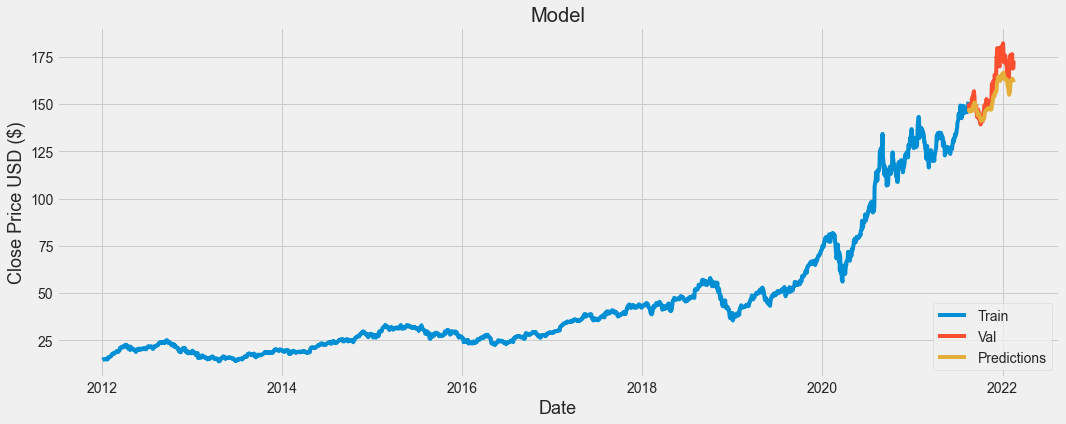

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
import tensorflow as tf
tf.keras.backend.clear_session()